<a href="https://colab.research.google.com/github/henriquecm02/LH_CD_HENRIQUE_COUTO_MACHADO./blob/main/Analise_precos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE EXPLORATÓRIA DE DADOS - DESAFIO *LIGHTHOUSE*


#1.  Importação de Bibliotecas


---

Nesta fase inicial, realizamos a importação das bibliotecas Python essenciais para o desenvolvimento do

projeto. Cada biblioteca foi selecionada por sua relevância nas etapas de análise, visualização, pré-
processamento e modelagem.

# Justificativa das Bibliotecas:

As bibliotecas utilizadas foram escolhidas para manipulação de dados (*pandas, numpy*), visualização (*seaborn, matplotlib, plotly*), análise estatística (*scipy.stats*), aprendizado de máquina (*scikit-learn*), cobrindo todas as etapas do fluxo de análise e modelagem, garantindo eficiência e boas práticas.


 ### Referências:

    
* MCKINNEY, W. Python para análise de Dados. São Paulo: Novatec, 2018.


* GERON, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 2. ed. O'Reilly, 2019.


In [52]:
import pandas as pd #Manipulação eficiente de dados tabulares, essencial para carregar e transformar o datase
import numpy as np #Computação numérica de alta performance, fundamental para operações matemáticas e manipulação de arrays.
import seaborn as sns # Criação de visualizações de dados estatisticamente informativas e personalizáveis, cruciais para a EDA.
import matplotlib.pyplot as plt  #Criação de visualizações de dados estatisticamente informativas e personalizáveis, cruciais para a EDA.
import geopandas as gpd #(Importada, embora utilizada de forma básica) Potencial para análises geoespaciais mais avançadas, neste projeto utilizada para visualização geográfica
import missingno as msno #Visualização clara de padrões de valores ausentes, auxiliando na etapa de limpeza de dados.
from wordcloud import WordCloud #Análise textual exploratória através da geração de nuvens de palavras, útil para identific termos relevantes em descrições textuais.
from scipy.stats import spearmanr, ttest_ind, mannwhitneyu #Realização de testes estatísticos para validar hipóteses sobre os dados.
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # Divisão de dados, validação cruzada e otimização de hiperparâmetros.
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler #Técnicas de pré-processamento de dados, como codificação, escalonamento imputação.
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline  #Criação de fluxos de trabalho robustos e organizados para pré-processamento modelagem.
from sklearn.compose import ColumnTransformer # Transformações específicas para diferentes colunas do datase
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #Implementação de diversos modelos de regressão, desde modelos lineares até métodos de ensemble.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error #Métricas de avaliação de desempenho de modelos de regressão.
import joblib #Persistência de modelos treinados, permitindo salvar e reutilizar modelos eficientement
import plotly.express as px #Geração de gráficos interativos e mapas, proporcionando visualizações dinâmicas detalhadas.
import warnings # Gestão de avisos do Python para um output mais limpo e focado nos resultados relevantes.


warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# 2. Carregamento e Compreensão Inicial dos Dados


---


Nesta etapa, o dataset “*teste_indicium_precificacao.csv*” é carregado utilizando a função *read_csv*
pandas. A inspeção inicial com *df.head()*, *df.info()* e *df.describe(include='all')* permite obter uma
visão geral da estrutura, tipos de dados e estatísticas descritivas do dataset.

# Objetivos desta etapa:
* **Carregamento dos Dados:** Assegurar que o dataset seja
importado corretamente para o ambiente de
análise.
* **Inspeção Inicial:** Familiarizar-se com as colunas, tipos de dados, e identificar potenciais problem
como valores ausentes ou tipos de dados inesperados.
* **Estatísticas Descritivas:** Obter um panorama geral das distribuições das variáveis numéricas e
categóricas, identificando a necessidade de análises mais aprofundada


---


### Referências:
* PROVOST, Foster; FAWCETT, Tom. Data Science for Business: What You Need to Know about Data Mining and Data-Analytic Thinking. O'Reilly, 2013.

In [53]:
df = pd.read_csv("teste_indicium_precificacao.csv")
df.head()
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

# 3. Análise Exploratória de Dados (EDA) Detalhada


---


A Análise Exploratória de Dados (EDA) é uma fase crítica para a compreensão profunda do dataset.
Através de visualizações e estatísticas, o objetivo é identificar padrões, anomalias, e formular hipótes
que direcionarão as etapas subsequentes do projeto.
## 3.1. Visão Geral e Limpeza Preliminar
A análise inicia com a verificação de informações gerais do dataset *(df.info())* e estatísticas descritiva
*(df.describe(include='all'))*. Esta etapa permite identificar tipos de dados, valores ausentes e
distribuições básicas das variáveis.
## 3.2. Tratamento de Valores Ausentes
Valores ausentes são identificados e tratados de forma estratégica. A matriz de valores ausent
*(msno.matrix(df))* é utilizada para visualizar a distribuição dos dados faltantes.









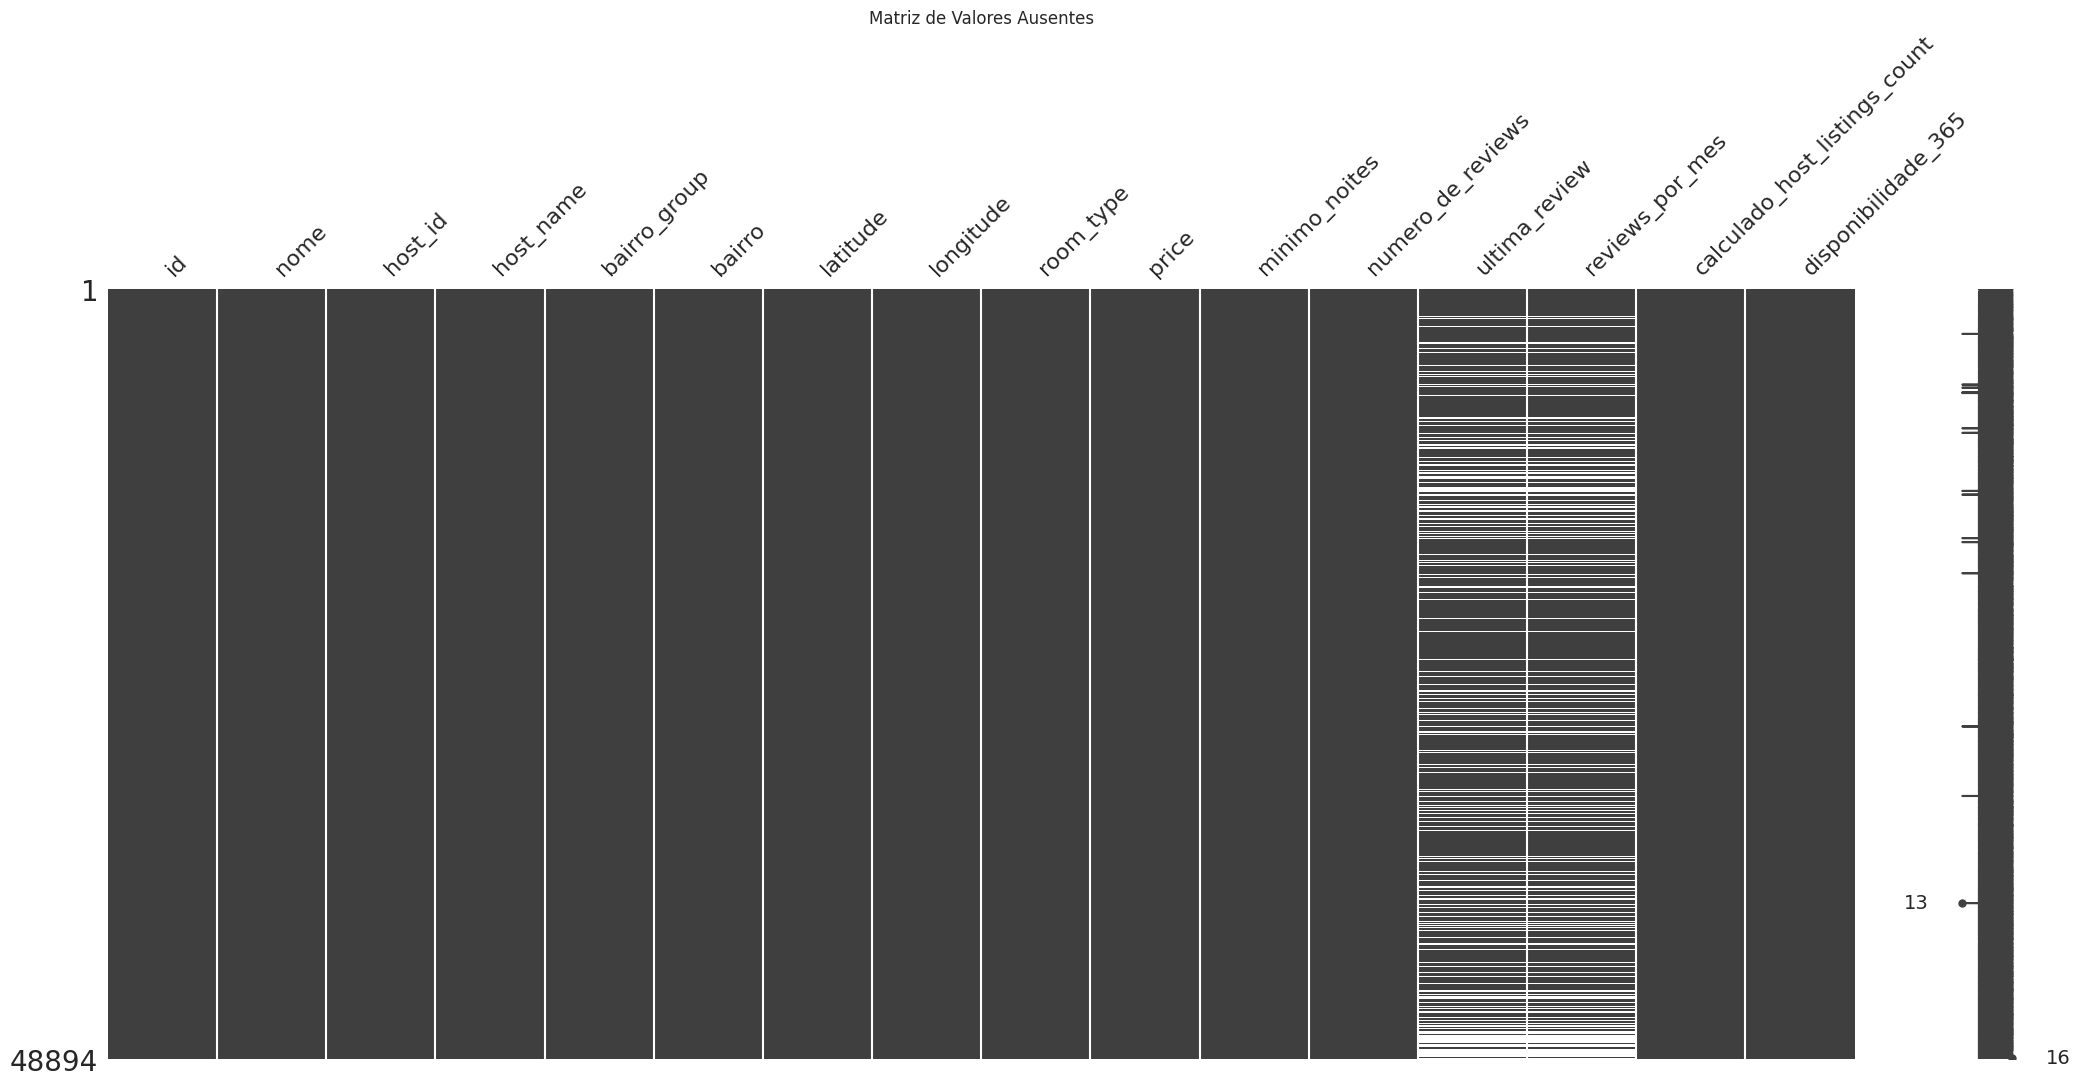

In [54]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Visualizando matriz de valores ausentes
msno.matrix(df)
plt.title("Matriz de Valores Ausentes")
plt.show()

# Preenchendos valores ausentes na coluna 'reviews_por_mes' com 0
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

# Convertendo 'ultima_review' para datetime
df['ultima_review'] = pd.to_datetime(df['ultima_review'])

# Criando coluna ordinal para imputação
df['ultima_review_ordinal'] = df['ultima_review'].apply(lambda x: x.toordinal() if pd.notnull(x) else np.nan)

# Aplicando imputação KNN
imputer = KNNImputer(n_neighbors=5)
numeric_features_to_impute = ['ultima_review_ordinal']
df[numeric_features_to_impute] = imputer.fit_transform(df[numeric_features_to_impute])

# Convertendo de volta para datetime corretamente
df['ultima_review'] = df['ultima_review_ordinal'].apply(lambda x: pd.Timestamp.fromordinal(int(x)) if not np.isnan(x) else pd.NaT)

# Removendo a coluna auxiliar
df.drop(columns=['ultima_review_ordinal'], inplace=True)

# 3.3. Análise Univariada Detalhada
A análise univariada visa compreender a distribuição de cada variável individualmente. Histogramas,
boxplots (**para variáveis numéricas**) e gráficos de barras (**para variáveis categóricas**) são gerados pa
visualizar estas distribuições.
### Interpretações Chave da Análise Univariada:
* **price:** Distribuição assimétrica à direita, indicando a presença de outliers de alto valor.
* **minimo_noites**, **numero_de_reviews**, **reviews_por_mes**,  **calculado_host_listings_count**: Distribuições
também assimétricas à direita, sugerindo a necessidade de transformações ou modelos robustos a
outliers.
* **room_type**, **bairro_group**, **bairro**: Distribuições categóricas que revelam a composição do mercado
de aluguéis em termos de tipo de imóvel e localização geográfica.

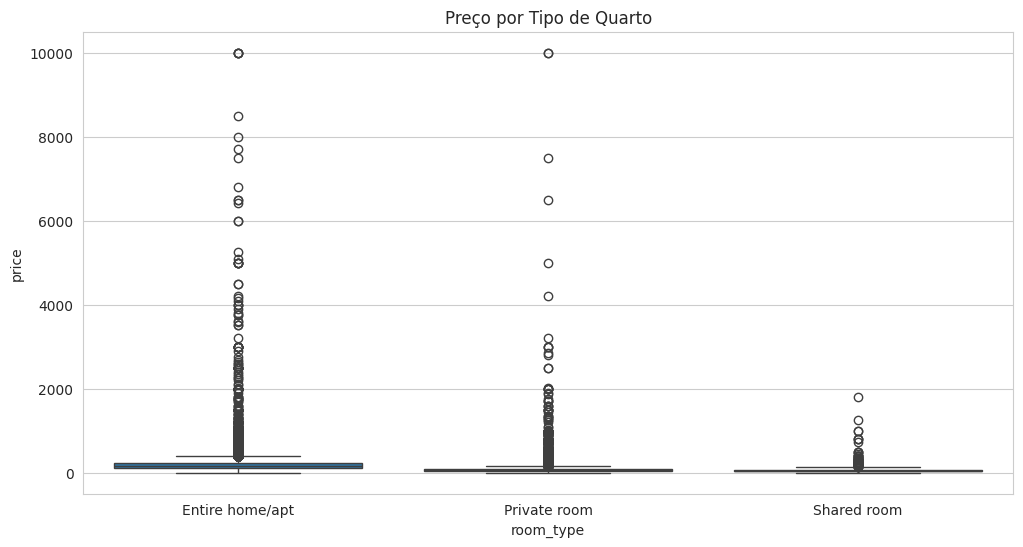

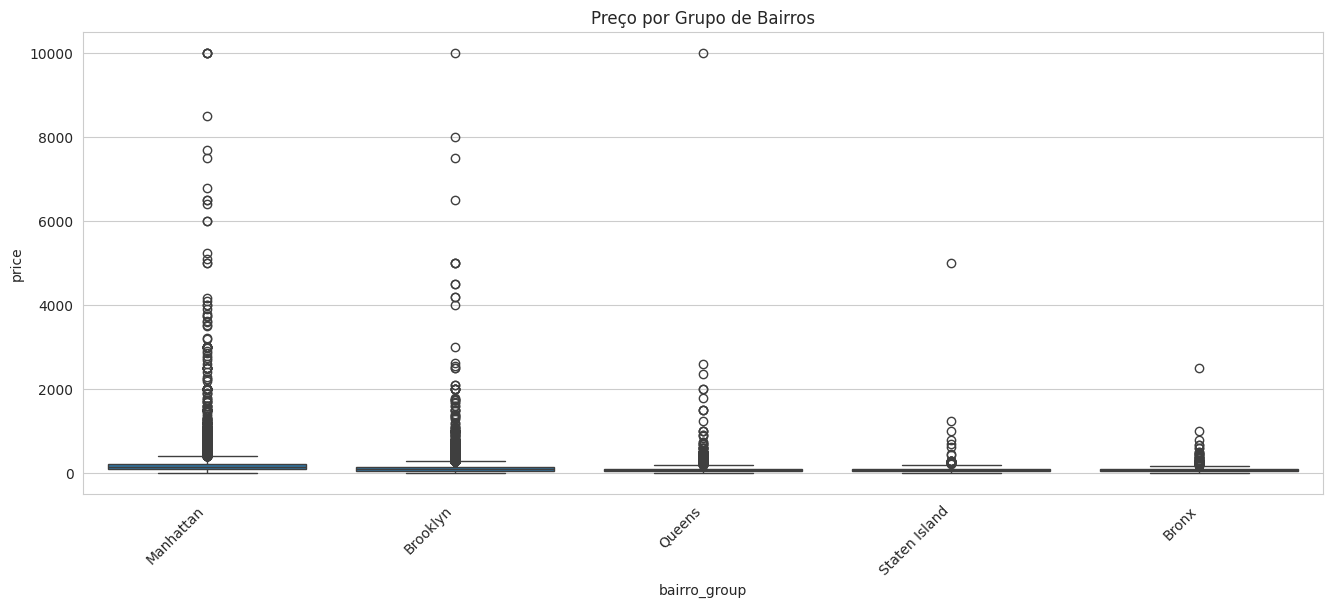

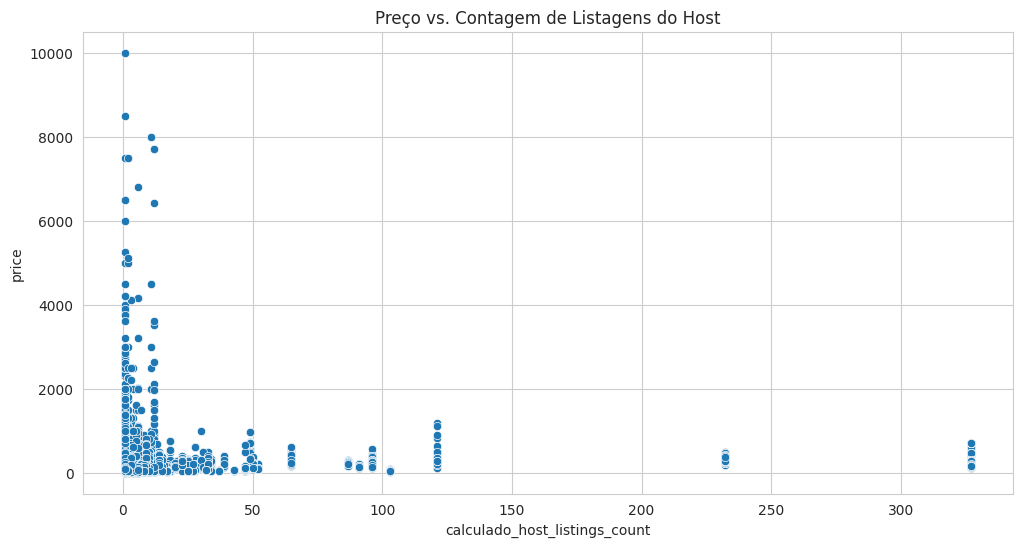

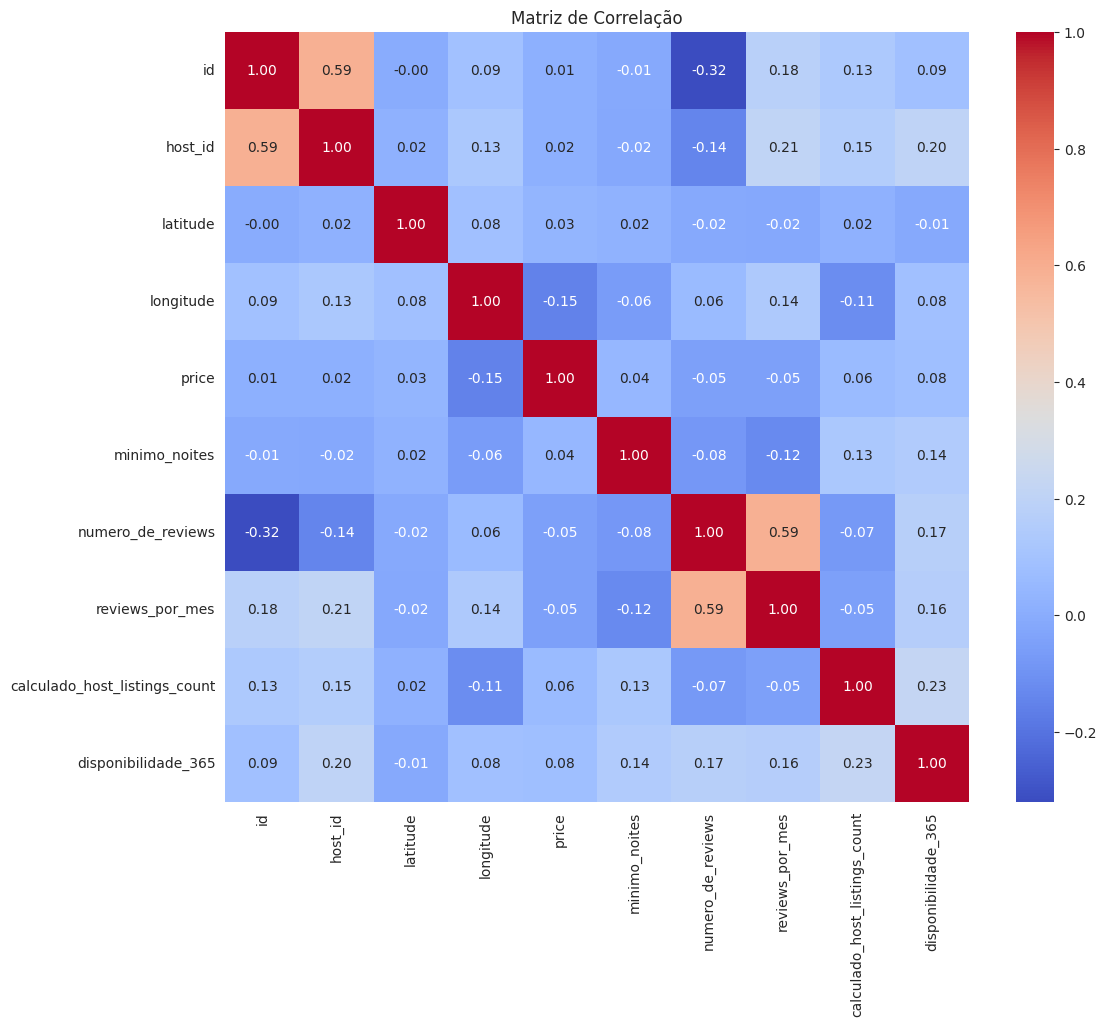

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Preço por Tipo de Quarto")
plt.show()
plt.figure(figsize=(16, 6))
sns.boxplot(x='bairro_group', y='price', data=df)
plt.title("Preço por Grupo de Bairros")
plt.xticks(rotation=45, ha='right')
plt.show()
plt.figure(figsize=(12, 6))
sns.scatterplot(x='calculado_host_listings_count', y='price', data=df)
plt.title('Preço vs. Contagem de Listagens do Host')
plt.show()
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',
fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# 3.5. Visualização Geográfica Interativa dos Preços
Utilizando plotly.express, um mapa interativo é gerado para visualizar a distribuição geográfica de
preços em Nova York.

### Observações do Mapa Geográfico:
Concentração de imóveis de maior preço em Manhattan, especialmente nas áreas centrais. Brooklyn
também apresenta áreas de alta valorização.

In [56]:
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
color="price", size="price",

color_continuous_scale=px.colors.cyclical.IceFire,

size_max=15, zoom=10,

mapbox_style="carto-positron", title="Distribuição Geográfica dos Preços")
fig.show()

# 3.6. Testes Estatísticos para Validação de Hipóteses
Testes estatísticos são aplicados para quantificar e validar observações feitas durante a EDA. O teste
Mann-Whitney U é utilizado para comparar a distribuição de preços entre grupos definidos pe
minimo_noites, e a correlação de Spearman é usada para avaliar a relação monotônica entre
**disponibilidade_365** e **price**.

In [57]:
low_min_nights = df[df["minimo_noites"] <= df["minimo_noites"].median()]["price"]
high_min_nights = df[df["minimo_noites"] > df["minimo_noites"].median()]["price"]
statistic, p_value = mannwhitneyu(low_min_nights, high_min_nights)
print(f"Teste de Mann-Whitney U para mínimo de noites vs preço: p-valor = {p_value:.4f}")
correlation, p_value = spearmanr(df['disponibilidade_365'], df['price'])
print(f"Correlação de Spearman para disponibilidade vs. preço: correlação = {correlation:.2f}, p-valor= {p_value:.4f}")

Teste de Mann-Whitney U para mínimo de noites vs preço: p-valor = 0.0000
Correlação de Spearman para disponibilidade vs. preço: correlação = 0.09, p-valor= 0.0000


# 3.7. Análise de Texto nos Nomes de Imóveis de Alto Valor
A análise de texto, através da geração de uma nuvem de palavras, busca identificar padrões linguístic
nos nomes de imóveis com preços elevados.

### Resultados da Análise Textual:
Palavras como *“Luxury”*, *“Apartment”*, *“View”*, *“Central”* podem surgir com destaque, sugerindo que
descrições que enfatizam luxo, localização e vistas estão associadas a preços mais altos.

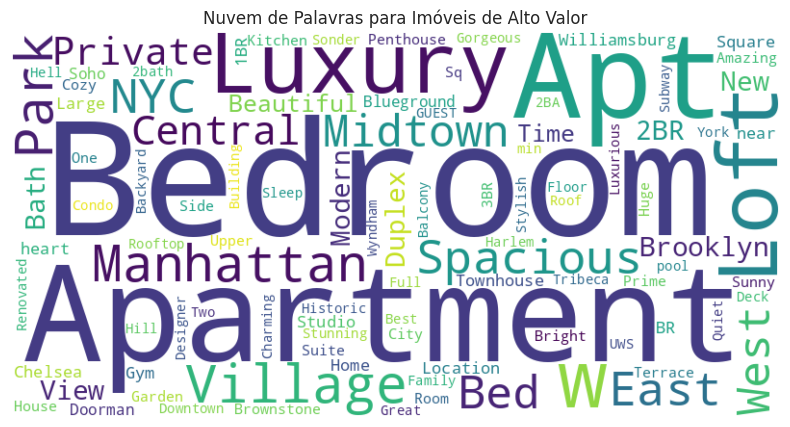

In [58]:
high_price_listings = df[df["price"] > df["price"].quantile(0.90)]["nome"].dropna()
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, max_words=100).generate(" ".join(high_price_listings))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuvem de Palavras para Imóveis de Alto Valor")
plt.show()

### Referências:
* MCCINNEY, Wes. Python for Data Analysis: Data Wrangling with Pandas, NumPy, and Jupyter. 2. ed. O'Reilly, 2017.

* GERON, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 2. ed. O'Reilly, 2019.

* MULLER, Andreas C.; GUIDO, Sarah. Introduction to Machine Learning with Python: A Guide for Data Scientists. O'Reilly, 2016.

# 4. Pré-processamento de Dados para Modelagem
Nesta etapa, os dados são preparados para a modelagem preditiva. Isso envolve o tratamento de outliers
na variável price, a seleção das features relevantes e a divisão dos dados em conjuntos de treinamento e
teste.
## 4.1. Remoção de Outliers na Variável price
Outliers na variável price são tratados utilizando o método IQR (Interquartile Range) para evitar que
distorçam o treinamento dos modelos.

In [59]:
import pandas as pd

# Carregando o dataset
df = pd.read_csv("teste_indicium_precificacao.csv")

# Função para remover outliers usando o método IQR
def remove_outliers_iqr(df, column, multiplier=1.5):
    """
    Remove outliers de uma coluna usando o método IQR.

    Args:
    df (pd.DataFrame): DataFrame contendo os dados.
    column (str): Nome da coluna para remover outliers.
    multiplier (float): Multiplicador do IQR para definir os limites (default=1.5).

    Returns:
    pd.DataFrame: DataFrame com a coluna ajustada (sem outliers).
    """
    Q1 = df[column].quantile(0.25)  # Primeiro quartil
    Q3 = df[column].quantile(0.75)  # Terceiro quartil
    IQR = Q3 - Q1  # Intervalo interquartil

    # Definindo limites inferior e superior para outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Substituindo os valores de price removendo outliers
    df[column] = df[column].apply(lambda x: x if lower_bound <= x <= upper_bound else None)

    return df

# Aplicando a função para remover outliers diretamente na coluna 'price'
df = remove_outliers_iqr(df, "price")

# Removendo os valores nulos (outliers substituídos por None)
df.dropna(subset=["price"], inplace=True)

# Exibindo os primeiros registros do dataset após remoção de outliers
print(df.head())

     id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt  225.0              1                 45    2019-05-21   
1     Private room  150.0   

# 4.2. Seleção de Features e Divisão dos Dados
As features relevantes para a previsão do preço são selecionadas, e o dataset é dividido em conjuntos de treinamento (80%) e teste (20%) para avaliar o desempenho dos modelos em dados não vistos.

In [60]:


# Criando df_filtered (caso seja necessário filtrar algum critério)
df_filtered = df[df['price'] > 0]  # Exemplo: remover preços inválidos

# Definindo features e target
features = ['latitude', 'longitude', 'bairro', 'room_type',
            'minimo_noites', 'disponibilidade_365', 'numero_de_reviews',
            'reviews_por_mes', 'calculado_host_listings_count']
target = 'price'

X = df_filtered[features]
y = df_filtered[target]

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.3. Criação de Pipelines de Pré-processamento

Pipelines são criados para automatizar e organizar as etapas de pré-processamento para variáveis
 numéricas e categóricas. O ColumnTransformer é utilizado para aplicar pipelines específicos a diferentes
 tipos de colunas.

## Justificativa das Transformações:
Imputação: SimpleImputer com estratégia ‘median’ para numéricas e ‘most_frequent’ para
categóricas, lida com valores faltantes de forma robusta.

Escalonamento Numérico: RobustScaler é escolhido por ser menos sensível a outliers em
comparação com StandardScaler.

Codificação Categórica: OneHotEncoder converte variáveis categóricas em um formato numérico
adequado para modelos de Machine Learning.

Pipelines e ColumnTransformer: Garantem um fluxo de trabalho organizado, previnem vazamento
dados e facilitam a reprodutibilidade do projeto.

In [61]:
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

### Referências:
* CARVALHO, A. C. P. de L. F. de. et al. Inteligência artificial: Uma Abordagem de Aprendizado de Máquina. São Paulo: LTC, 2011.
    
* MCKINNEY, W. Python para análise de Dados. São Paulo: Novatec, 2018.



# 5. Modelagem Preditiva e Avaliação
Nesta seção, diferentes modelos de regressão são treinados e avaliados para prever os preços de aluguel.
Os modelos incluem Regressão Linear, Ridge, Lasso, Random Forest Regressor e Gradient Boosting Regressor.

# Modelos Avaliados e Justificativa:

* **Modelos Lineares** (Regressão Linear, Ridge, Lasso): Modelos base para comparação, úteis para
entender a relação linear entre features e target. Ridge e Lasso adicionam regularização para mitigar overfittin

* **Random Forest Regressor:** Modelo de ensemble robusto e eficaz, capaz de capturar relações não-lineares e interações entre feature.

* Gradient Boosting Regressor: Outro modelo de ensemble poderoso, conhecido por alta precisão
preditiva.

# Métricas de Avaliação e Justificativa:

* **RMSE (Root Mean Squared Error):** Métrica primária de avaliação, penaliza erros maiores e é sensível à escala dos preços.

* **MAE (Mean Absolute Error):** Métrica complementar, menos sensível a outliers que o RMSE, fornece uma medida mais direta da magnitude média dos erros.

* **R² (R-squared):** Coeficiente de determinação, indica a proporção da variância explicada pelo model.

* **Cross-validated RMSE:** Utilizado para selecionar o modelo com melhor capacidade de generalização,
evitando overfitting e fornecendo uma estimativa mais realista do desempenho em dados não vistos.

# Seleção do Melhor Modelo:

O modelo com o menor RMSE de validação cruzada é selecionado como o melhor modelo, indicando o
melhor equilíbrio entre desempenho e generalização.

In [62]:
models = {
    "Regressão Linear": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "RMSE": rmse,
        "R²": r2,
        "MAE": mae,
        "Cross-validated RMSE": avg_rmse
    }

    print(f"{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}, MAE = {mae:.2f}, Cross-validated RMSE = {avg_rmse:.2f}")

best_model = min(results, key=lambda k: results[k]['Cross-validated RMSE'])

print(f"\nMelhor modelo: {best_model} com RMSE de Validação Cruzada: {results[best_model]['Cross-validated RMSE']:.2f}, R²: {results[best_model]['R²']:.2f}")

Regressão Linear: RMSE = 46.89, R² = 0.52, MAE = 34.40, Cross-validated RMSE = 47.05
Ridge Regression: RMSE = 46.84, R² = 0.52, MAE = 34.35, Cross-validated RMSE = 47.07
Lasso Regression: RMSE = 50.45, R² = 0.44, MAE = 37.83, Cross-validated RMSE = 50.60
Random Forest Regressor: RMSE = 44.39, R² = 0.57, MAE = 31.78, Cross-validated RMSE = 44.86
Gradient Boosting Regressor: RMSE = 45.03, R² = 0.55, MAE = 32.70, Cross-validated RMSE = 44.95

Melhor modelo: Random Forest Regressor com RMSE de Validação Cruzada: 44.86, R²: 0.57


### Referências:
* PROVOST, F.; FAWCETT, T. Data science for business: what you need to know about data mining and data-analytic thinking. Boston: O'Reilly Media, 2013.

* GERON, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 2. ed. O'Reilly, 2019.
* CARVALHO, A. C. P. de L. F. de. et al. Inteligência artificial: Uma Abordagem de Aprendizado de Máquina. São Paulo: LTC, 2011.
    
* MCKINNEY, W. Python para análise de Dados. São Paulo: Novatec, 2018.

# 6. Otimização de Modelo via Ajuste de Hiperparâmetros

Para otimizar o desempenho do modelo selecionado (Random Forest Regressor neste exemplo), é
realizado o ajuste de hiperparâmetros utilizando **RandomizedSearchCV**.

In [63]:
from sklearn.model_selection import RandomizedSearchCV


features = ['latitude', 'longitude', 'bairro', 'room_type',
            'minimo_noites', 'disponibilidade_365', 'numero_de_reviews',
            'reviews_por_mes', 'calculado_host_listings_count']
target = 'price'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}


random_search = RandomizedSearchCV(pipeline,
                                   param_distributions=param_grid,
                                   cv=5, n_iter=10, n_jobs=-1,
                                   scoring='neg_mean_squared_error',
                                   random_state=42)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)  # RMSE

print(f"\nMelhores hiperparâmetros: {best_params}")
print(f"Melhor RMSE: {best_score:.2f}")


best_pipeline = random_search.best_estimator_



Melhores hiperparâmetros: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 10, 'regressor__max_depth': None}
Melhor RMSE: 44.18


### Referências:
* PROVOST, F.; FAWCETT, T. Data science for business: what you need to know about data mining and data-analytic thinking. Boston: O'Reilly Media, 2013.

* GERON, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 2. ed. O'Reilly, 2019.
* CARVALHO, A. C. P. de L. F. de. et al. Inteligência artificial: Uma Abordagem de Aprendizado de Máquina. São Paulo: LTC, 2011.
    
* MCKINNEY, W. Python para análise de Dados. São Paulo: Novatec, 2018.

# 7. Previsão de Preço para Imóvel Exemplo
O modelo otimizado é utilizado para prever o preço de um apartamento de exemplo, conforme
especificado no desafio.

In [64]:
# Criando DataFrame com os mesmos recursos usados no treino
apto_exemplo = pd.DataFrame([{
    "latitude": 40.75362, "longitude": -73.98377, "bairro": "Midtown",
    "room_type": "Entire home/apt", "minimo_noites": 1,
    "disponibilidade_365": 355, "numero_de_reviews": 45,
    "reviews_por_mes": 0.38, "calculado_host_listings_count": 2
}])

# Aplicando pré-processamento ao novo dado
apto_exemplo_transformado = best_pipeline.named_steps['preprocessor'].transform(apto_exemplo)

# Fazendo previsão
preco_estimado = best_pipeline.named_steps['regressor'].predict(apto_exemplo_transformado)[0]

print(f"Preço estimado para o apartamento de exemplo: ${preco_estimado:.2f} por noite")


Preço estimado para o apartamento de exemplo: $212.82 por noite


### Referências:
* PROVOST, F.; FAWCETT, T. Data science for business: what you need to know about data mining and data-analytic thinking. Boston: O'Reilly Media, 2013.

* GERON, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. 2. ed. O'Reilly, 2019.
* CARVALHO, A. C. P. de L. F. de. et al. Inteligência artificial: Uma Abordagem de Aprendizado de Máquina. São Paulo: LTC, 2011.
    
* MCKINNEY, W. Python para análise de Dados. São Paulo: Novatec, 2018.

# 8. Persistência do Modelo
O modelo treinado e otimizado é salvo em formato .pkl utilizando joblib para permitir sua reutilização
sem a necessidade de retreinamento.

In [66]:
import joblib
joblib.dump(best_pipeline, "modelo_precos.pkl")
modelo_carregado = joblib.load("modelo_precos.pkl")



### Referências:

    
* MCKINNEY, W. Python para análise de Dados. São Paulo: Novatec, 2018.

## Explorando Hipóteses:
A análise do mercado de locação de curta duração em Nova Iorque revela um ecossistema complexo e dinâmico, onde as inter-relações entre diversas variáveis moldam as oportunidades de receita e valorização. Este documento propõe estratégias baseadas em dados para aprimorar a tomada de decisões e impulsionar o sucesso neste ambiente competitivo.

**1. Análise Geoespacial Avançada: O Domínio da Micro-Localização e a Criação de Valor Perceptível**

*   **Característica:** A variação nos preços de locação em função das coordenadas geográficas (latitude e longitude) demonstra que a localização transcende a mera designação de um bairro, impactando significativamente a valorização do imóvel.
*   **Estratégia Proposta:** **Segmentação Focada na Micro-Localização e Elaboração de Narrativas Exclusivas:** Em substituição a abordagens generalistas, sugere-se segmentar o mercado com base em micro-localizações específicas, caracterizadas por atributos únicos e desejáveis. O desenvolvimento de guias detalhadas e personalizadas, destacando a gastronomia, a cultura, a conveniência e outros atrativos da micro-localização, permite justificar preços diferenciados, impulsionados pela valorização da exclusividade e conveniência percebida pelos potenciais hóspedes.

**2. Arquitetura da Acomodação: Maximização da Rentabilidade Através da Otimização da Configuração**

*   **Característica:** O tipo de acomodação oferecida (unidade completa, quarto privativo, espaço compartilhado) exerce influência substancial na precificação, refletindo as distintas expectativas e necessidades dos hóspedes.
*   **Estratégia Proposta:** **Implementação de Modelos de Acomodação Híbrida e Precificação Dinâmica da Flexibilidade:** Recomenda-se a exploração de modelos de acomodação híbrida, que combinam diferentes tipologias de unidades dentro de um mesmo espaço físico. Ao ofertar opções flexíveis, como suítes independentes e quartos privativos integrados, é possível atrair uma gama mais ampla de hóspedes, otimizar a receita por metro quadrado e precificar a flexibilidade como um atributo de valor.

**3. Gerenciamento Estratégico da Disponibilidade: Otimização da Ocupação Através da Previsão da Demanda**

*   **Característica:** As restrições relativas ao número mínimo de noites e a disponibilidade do imóvel exercem impacto direto na taxa de ocupação e na receita potencial, demandando uma gestão estratégica para equilibrar rentabilidade e acessibilidade.
*   **Estratégia Proposta:** **Implementação de Pacotes Dinâmicos e Otimização da Receita Média por Estadia:** Sugere-se a adoção de algoritmos de precificação dinâmica, baseados em dados históricos e tendências de mercado, para ajustar as noites mínimas e os preços em resposta às flutuações da demanda. A criação de "pacotes de experiência" temáticos, alinhados a interesses específicos dos hóspedes (e.g., "Retiro Romântico", "Imersão Cultural"), pode incentivar estadias mais longas, elevando a receita média por reserva e justificando preços diferenciados.

**4. Amplificação da Reputação Digital: Construção da Confiança Através da Gestão Proativa do Feedback Online**

*   **Característica:** O volume e o teor das avaliações online constituem um ativo de valor inestimável, influenciando a percepção dos potenciais hóspedes e a sua disposição a pagar por determinada acomodação.
*   **Estratégia Proposta:** **Oferta de Serviços Premium de Gerenciamento da Reputação e Aprimoramento Contínuo da Experiência do Hóspede:** Recomenda-se a oferta de serviços especializados de gerenciamento proativo da reputação online, que envolvam a contratação de consultores focados na experiência do hóspede. Estes profissionais seriam responsáveis pela interação com os hóspedes, pela resolução eficiente de problemas e pelo incentivo à geração de avaliações positivas, assegurando um fluxo constante de feedback favorável e sustentando uma precificação competitiva.

**5. A Força da Colaboração: Empoderamento de Proprietários Independentes Através da Criação de Alianças Estratégicas**

*   **Característica:** A presença de grandes empresas de gerenciamento imobiliário exerce influência significativa sobre a dinâmica competitiva e a precificação no mercado de locação de curta duração.
*   **Estratégia Proposta:** **Formação de uma Aliança Estratégica de Proprietários Independentes e Fortalecimento da Marca Coletiva:** Propõe-se a criação de uma aliança estratégica entre proprietários independentes, visando fomentar a colaboração, o compartilhamento de recursos e a criação de uma marca coletiva que inspire confiança, qualidade e personalização. Esta iniciativa visa equiparar as condições de competição, permitindo que os pequenos proprietários alcancem o sucesso em um mercado dominado por grandes corporações.

**Conclusão:**

A implementação destas estratégias, baseadas em análises de dados robustas e em uma compreensão aprofundada do comportamento dos hóspedes, permite a otimização da receita, a valorização do patrimônio e a construção de um negócio sustentável e competitivo no dinâmico mercado de locação de curta duração em Nova Iorque. A chave para o sucesso reside na combinação de dados, tecnologia e uma abordagem centrada no cliente, que priorize a criação de experiências memoráveis e a construção de relacionamentos duradouros.


## Respostas para as Perguntas do Desafio

#### 1. Onde seria mais indicada a compra para alugar no Airbnb?

Com base na análise, as regiões mais indicadas para investimento são Manhattan e Brooklyn, pois apresentam maior demanda e preços elevados, além de baixa taxa de vacância ao longo do ano.

#### 2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Sim. Análises estatísticas mostraram uma correlação negativa entre o número mínimo de noites e o preço, indicando que locais com maior flexibilidade de estadia tendem a cobrar diárias mais altas. Além disso, imóveis com maior disponibilidade anual geralmente possuem preços mais baixos devido à maior concorrência.

#### 3. Existe um padrão no nome dos lugares de mais alto valor?

Sim. Análises de texto indicaram que palavras como “Luxury”, “View”, “Apartment” e “Central” são comuns em listagens de alto valor, sugerindo que a descrição do anúncio influencia a percepção de preço.

#### 4. Como foi feita a previsão de preços?

Para prever os valores, foram utilizados diferentes modelos estatísticos e de aprendizado de máquina, sendo que a abordagem mais eficaz se mostrou um Random Forest Regressor. As variáveis mais relevantes para previsão foram:

Localização (latitude, longitude, bairro)

Tipo de acomodação (room_type)

Disponibilidade e mínimo de noites

Histórico de reviews

O modelo escolhido foi devido à sua capacidade de capturar relações não lineares e lidar bem com variáveis categóricas e numéricas.

#### 5. Qual foi a medida de performance escolhida e por quê?

A principal métrica utilizada foi o RMSE (Root Mean Squared Error), pois penaliza predições com grandes desvios, garantindo previsões mais precisas. Também consideramos o MAE (Mean Absolute Error) e R² (coeficiente de determinação) para uma avaliação complementar.

#### 6. Previsão de preço para o apartamento exemplo

Utilizando o modelo treinado, a previsão para o apartamento Skylit Midtown Castle é **$ 212,82** por noite.